In [71]:
from google.colab import files
uploaded = files.upload()   # upload my visiontools

Saving visiontools.py to visiontools.py


In [72]:
import visiontools

In [73]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import gridspec
#import learntools.computer_vision.visiontools as visiontools

In [74]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

In [75]:
# Read image
image_path = "/content/car_illus.jpg"
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

In [80]:
# Embossing kernel
kernel = tf.constant([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])


In [81]:
# Reformat for batch compatibility
image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # from [0, 255] (uint8) to [0.0, 1.0] (float32). Neural net works better at float inputs
image = tf.expand_dims(image, axis=0)  # Add a new dimension
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])   # Add two dimension/shape
kernel = tf.cast(kernel, dtype=tf.float32)   # Convert the kernel to float32 dtype


In [82]:
image_filter = tf.nn.conv2d(
    input = image,
    filters=kernel,
    strides=1,
    padding='VALID'
)


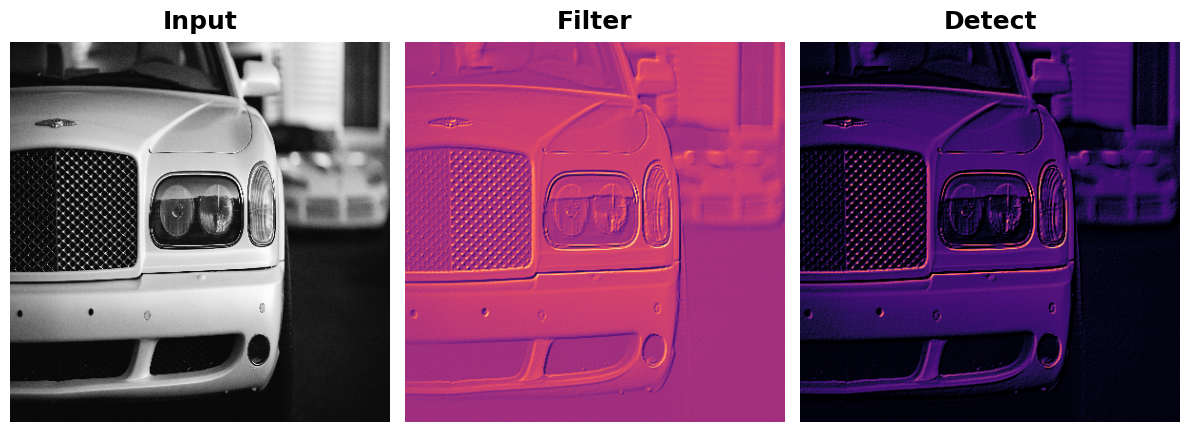

In [83]:



image_detect = tf.nn.relu(image_filter)
image_detect = tf.squeeze(image_detect, axis=1)  # Remove 2nd dimension

# Show
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')

plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')

plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
plt.show()

# Apply maximum pooling

In [84]:
image_condense = tf.nn.pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME'
)

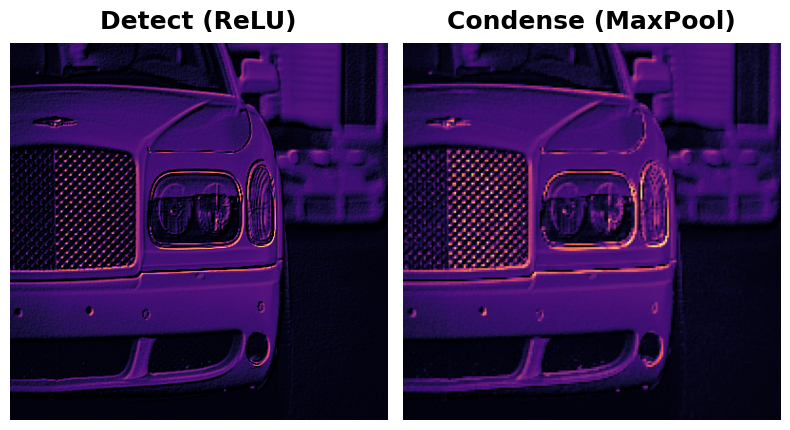

In [85]:
plt.figure(figsize=(8, 6))

plt.subplot(121)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title("Detect (ReLU)")

plt.subplot(122)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title("Condense (MaxPool)")
plt.show()

In [86]:
print(image.shape)
print(type(image))

(1, 1, 400, 400, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [88]:
image = tf.convert_to_tensor(image, dtype=tf.float32)
image = tf.squeeze(image)
image = tf.expand_dims(image, axis=-1)

In [89]:
REPEATS = 4
SIZE = [64, 64]

# Create a randomly shifted circle
image = visiontools.circle(SIZE, r_shrink=4, val=1)
image = tf.expand_dims(image, axis=-1)
image = visiontools.random_transform(image, jitter=3, fill_method='replicate')
image = tf.squeeze(image)

ValueError: Unsupported image shape